<a href="https://colab.research.google.com/github/Angssravankumar/VLG/blob/main/FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil

# Define the paths
high_path = '/content/drive/MyDrive/high'
low_path = '/content/drive/MyDrive/low'
train_high_path = 'train/high'
train_low_path = 'train/low'
test_high_path = 'test/high'
test_low_path = 'test/low'

# Create directories for train and test sets
os.makedirs(train_high_path, exist_ok=True)
os.makedirs(train_low_path, exist_ok=True)
os.makedirs(test_high_path, exist_ok=True)
os.makedirs(test_low_path, exist_ok=True)

# Function to move files to the appropriate directory
def move_files(src_dir, dest_dir, file_list):
    for file_name in file_list:
        src_file = os.path.join(src_dir, file_name)
        dest_file = os.path.join(dest_dir, file_name)
        shutil.move(src_file, dest_file)

# Get list of files in high and low directories
high_files = sorted(os.listdir(high_path))
low_files = sorted(os.listdir(low_path))

# Split files into train and test sets
test_high_files = high_files[:80]
train_high_files = high_files[80:]

test_low_files = low_files[:80]
train_low_files = low_files[80:]

# Move files to test directories
move_files(high_path, test_high_path, test_high_files)
move_files(low_path, test_low_path, test_low_files)

# Move files to train directories
move_files(high_path, train_high_path, train_high_files)
move_files(low_path, train_low_path, train_low_files)

print("Dataset split complete.")


Dataset split complete.


Displaying training images:


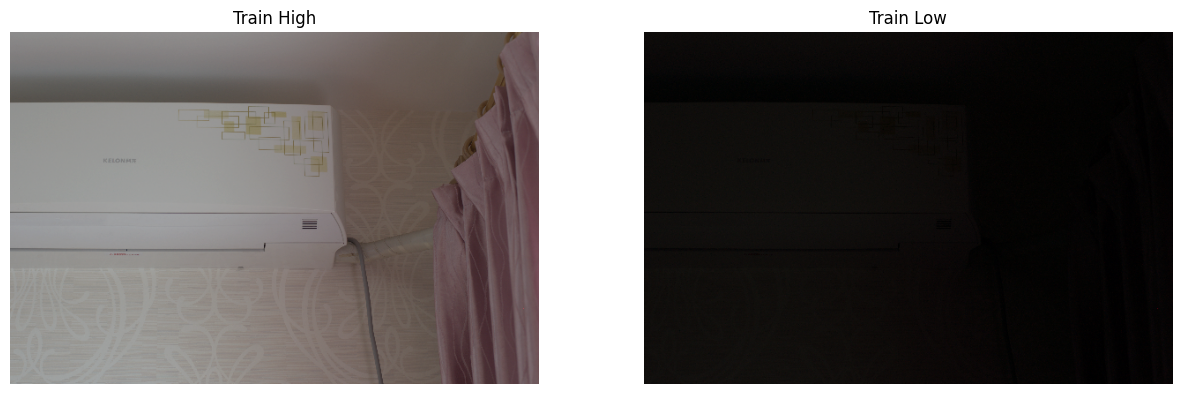

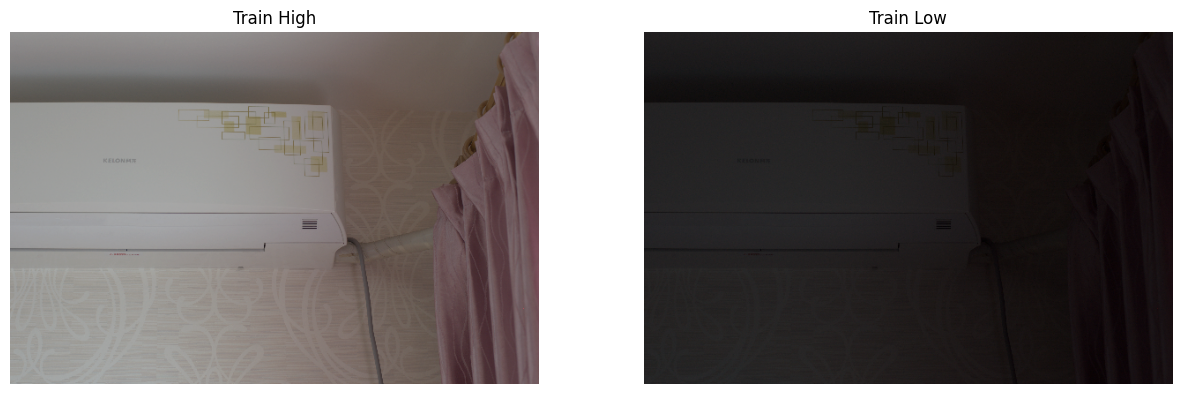

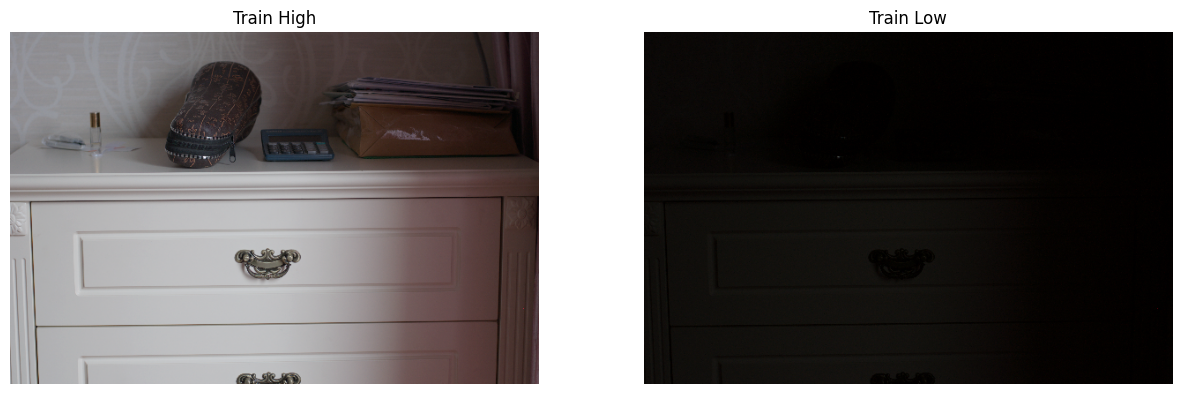

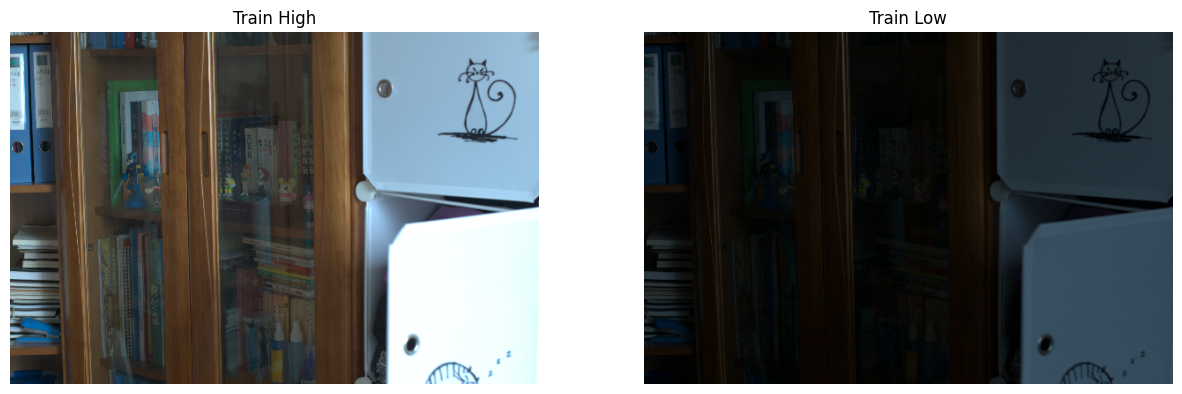

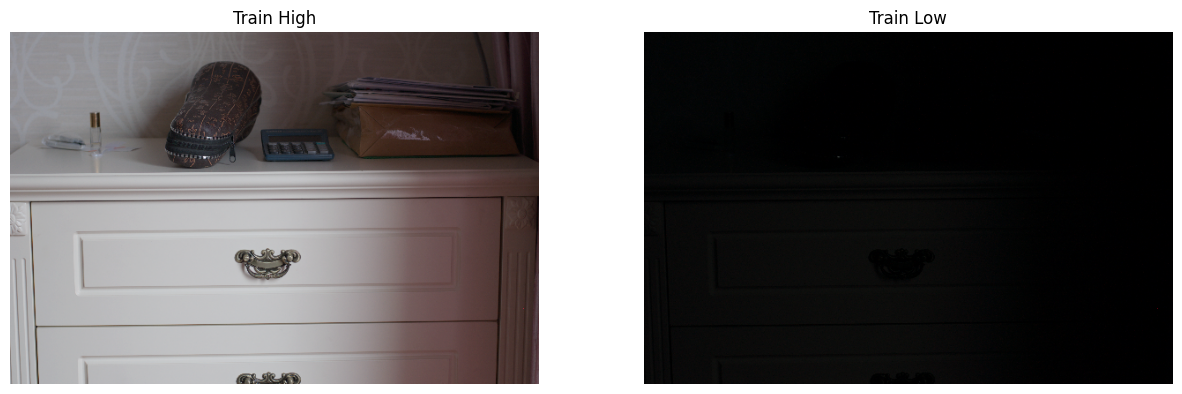

Displaying testing images:


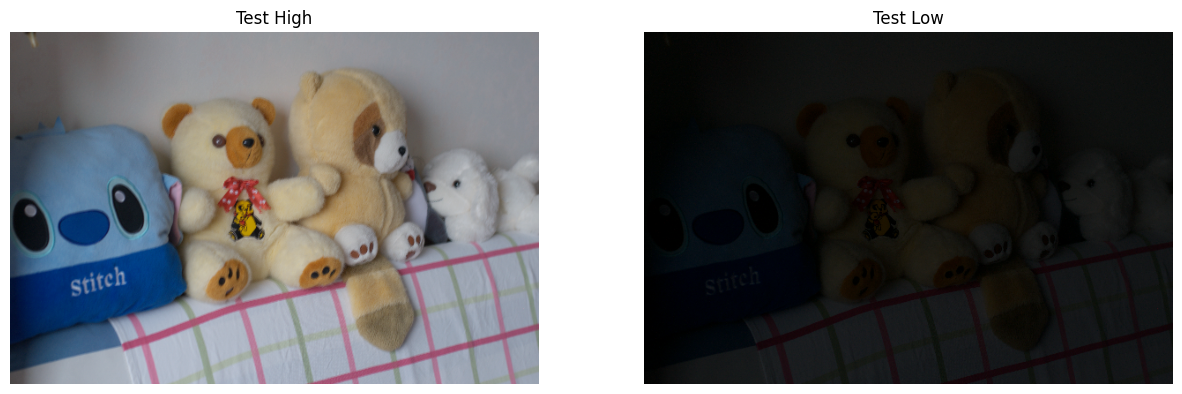

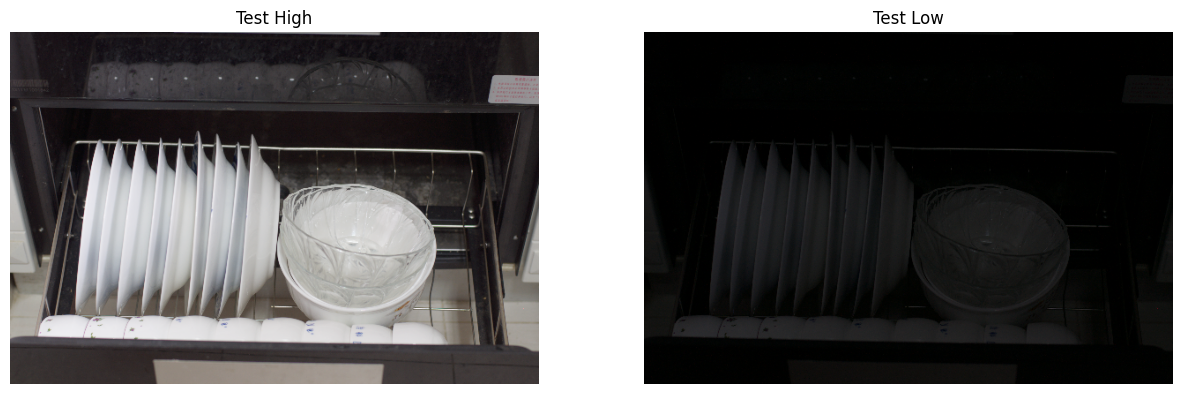

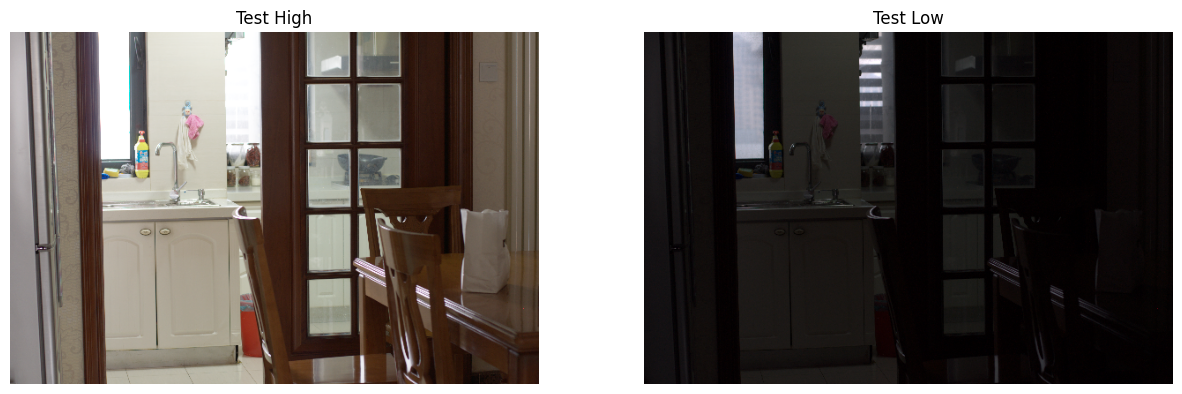

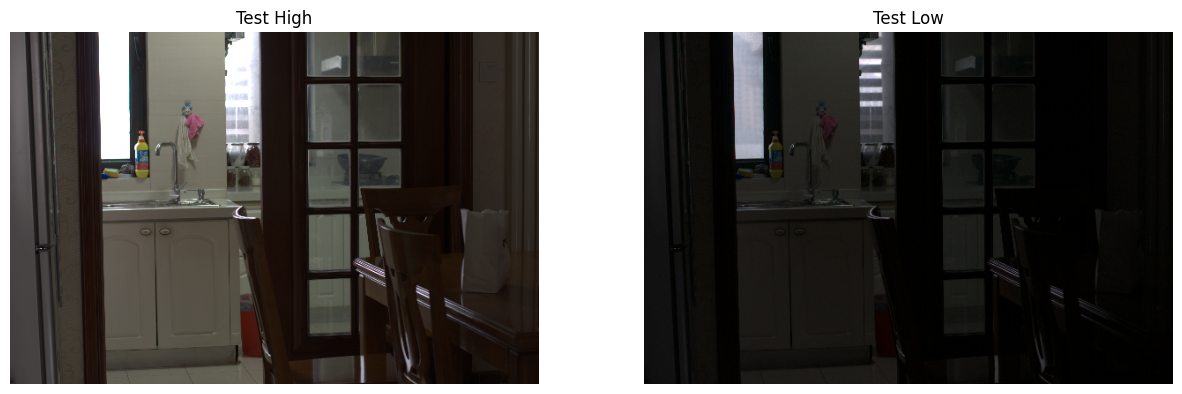

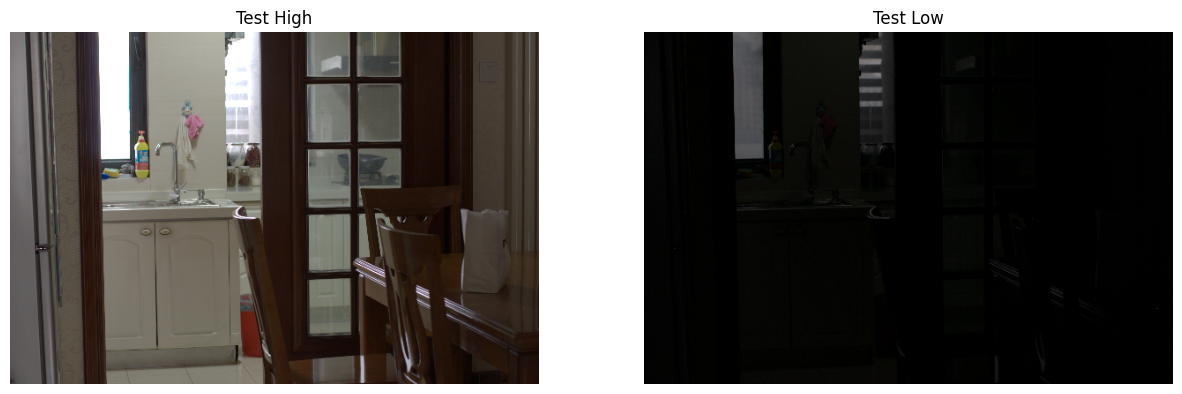

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Function to display images side by side
def display_images(image_paths, titles):
    images = [Image.open(img_path) for img_path in image_paths]
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')
    plt.show()

# Paths
train_high_path = 'train/high'
train_low_path = 'train/low'
test_high_path = 'test/high'
test_low_path = 'test/low'

# Display first 5 pairs of training images
train_high_images = sorted(os.listdir(train_high_path))[:5]
train_low_images = sorted(os.listdir(train_low_path))[:5]

print("Displaying training images:")
for high_img, low_img in zip(train_high_images, train_low_images):
    high_img_path = os.path.join(train_high_path, high_img)
    low_img_path = os.path.join(train_low_path, low_img)
    display_images([high_img_path, low_img_path], ["Train High", "Train Low"])

# Display first 5 pairs of testing images
test_high_images = sorted(os.listdir(test_high_path))[:5]
test_low_images = sorted(os.listdir(test_low_path))[:5]

print("Displaying testing images:")
for high_img, low_img in zip(test_high_images, test_low_images):
    high_img_path = os.path.join(test_high_path, high_img)
    low_img_path = os.path.join(test_low_path, low_img)
    display_images([high_img_path, low_img_path], ["Test High", "Test Low"])


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

# Define paths
train_high_path = 'train/high'
train_low_path = 'train/low'


In [ ]:
def plot_pixel_distribution(image_paths, title):
    all_pixels = []
    for img_path in image_paths:
        image = Image.open(img_path).convert('L')  # Convert to grayscale
        pixels = np.array(image).flatten()
        all_pixels.extend(pixels)

    plt.figure(figsize=(10, 5))
    plt.hist(all_pixels, bins=50, color='blue', alpha=0.7)
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Get image paths
train_high_images = sorted([os.path.join(train_high_path, img) for img in os.listdir(train_high_path)])
train_low_images = sorted([os.path.join(train_low_path, img) for img in os.listdir(train_low_path)])

# Plot pixel distributions
plot_pixel_distribution(train_high_images, 'Pixel Value Distribution - Train High')
plot_pixel_distribution(train_low_images, 'Pixel Value Distribution - Train Low')


In [ ]:
def calculate_psnr_ssim(high_images, low_images):
    psnr_values = []
    ssim_values = []

    for high_img_path, low_img_path in zip(high_images, low_images):
        high_img = np.array(Image.open(high_img_path).convert('L'))
        low_img = np.array(Image.open(low_img_path).convert('L'))

        psnr = peak_signal_noise_ratio(high_img, low_img)
        ssim = structural_similarity(high_img, low_img)

        psnr_values.append(psnr)
        ssim_values.append(ssim)

    return psnr_values, ssim_values

# Calculate PSNR and SSIM
psnr_values, ssim_values = calculate_psnr_ssim(train_high_images, train_low_images)

# Plot PSNR and SSIM
def plot_metric(metric_values, metric_name):
    plt.figure(figsize=(10, 5))
    plt.plot(metric_values, marker='o', linestyle='--', color='b')
    plt.title(f'{metric_name} Values')
    plt.xlabel('Image Index')
    plt.ylabel(metric_name)
    plt.show()

plot_metric(psnr_values, 'PSNR')
plot_metric(ssim_values, 'SSIM')


NameError: name 'train_high_images' is not defined

In [ ]:
def summary_statistics(metric_values, metric_name):
    mean_value = np.mean(metric_values)
    median_value = np.median(metric_values)
    std_value = np.std(metric_values)

    print(f'{metric_name} Summary Statistics:')
    print(f'Mean: {mean_value}')
    print(f'Median: {median_value}')
    print(f'Standard Deviation: {std_value}')

# Print summary statistics for PSNR and SSIM
summary_statistics(psnr_values, 'PSNR')
summary_statistics(ssim_values, 'SSIM')


In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Define paths
train_high_path = 'train/high'
train_low_path = 'train/low'
test_high_path = 'test/high'
test_low_path = 'test/low'

# Define paths for patches
train_high_patches_path = 'train_patches/high'
train_low_patches_path = 'train_patches/low'
test_high_patches_path = 'test_patches/high'
test_low_patches_path = 'test_patches/low'

# Create directories for patches
os.makedirs(train_high_patches_path, exist_ok=True)
os.makedirs(train_low_patches_path, exist_ok=True)
os.makedirs(test_high_patches_path, exist_ok=True)
os.makedirs(test_low_patches_path, exist_ok=True)


In [ ]:
def resize_image(image, size=(1024, 1024)):
    return image.resize(size, Image.ANTIALIAS)

def create_patches(image, patch_size=(256, 256)):
    patches = []
    img_width, img_height = image.size
    patch_width, patch_height = patch_size

    for i in range(0, img_width, patch_width):
        for j in range(0, img_height, patch_height):
            box = (i, j, i + patch_width, j + patch_height)
            patch = image.crop(box)
            patches.append(patch)

    return patches


In [ ]:
def process_and_save_patches(src_path, dest_path, img_size=(1024, 1024), patch_size=(256, 256)):
    image_files = sorted(os.listdir(src_path))

    for img_file in image_files:
        img_path = os.path.join(src_path, img_file)
        image = Image.open(img_path).convert('RGB')
        resized_image = resize_image(image, img_size)
        patches = create_patches(resized_image, patch_size)

        base_name = os.path.splitext(img_file)[0]
        for idx, patch in enumerate(patches):
            patch_name = f"{base_name}_patch_{idx}.png"
            patch_path = os.path.join(dest_path, patch_name)
            patch.save(patch_path)

# Process and save patches for train and test datasets
process_and_save_patches(train_high_path, train_high_patches_path)
process_and_save_patches(train_low_path, train_low_patches_path)
process_and_save_patches(test_high_path, test_high_patches_path)
process_and_save_patches(test_low_path, test_low_patches_path)


<ipython-input-5-3232c475b3c7>:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  return image.resize(size, Image.ANTIALIAS)


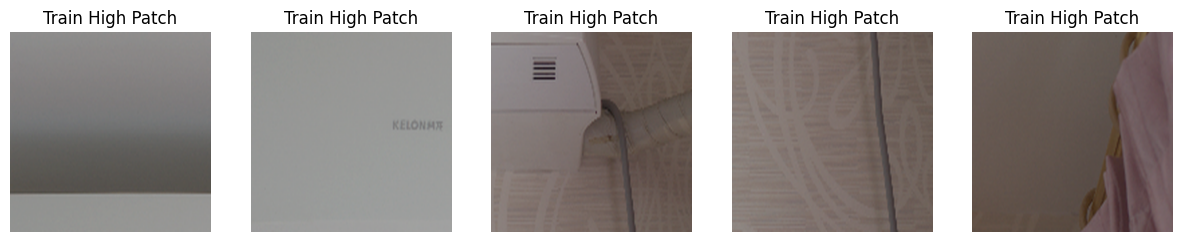

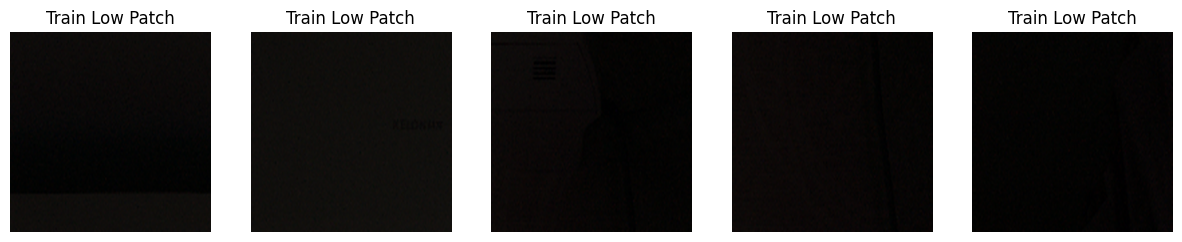

In [ ]:
def display_patches(patch_paths, title):
    patches = [Image.open(patch_path) for patch_path in patch_paths]
    fig, axes = plt.subplots(1, len(patches), figsize=(15, 5))
    for ax, patch, title in zip(axes, patches, title):
        ax.imshow(patch)
        ax.set_title(title)
        ax.axis('off')
    plt.show()

# Get some patch paths
train_high_patches = sorted(os.listdir(train_high_patches_path))[:5]
train_low_patches = sorted(os.listdir(train_low_patches_path))[:5]

# Display some train patches
train_high_patch_paths = [os.path.join(train_high_patches_path, patch) for patch in train_high_patches]
train_low_patch_paths = [os.path.join(train_low_patches_path, patch) for patch in train_low_patches]

display_patches(train_high_patch_paths, ["Train High Patch"]*5)
display_patches(train_low_patch_paths, ["Train Low Patch"]*5)


In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.restoration import denoise_nl_means, estimate_sigma

# Define paths for patches
train_low_patches_path = 'train_patches/low'


In [ ]:
def apply_nlm_filter(image_path, patch_size=(256, 256)):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image_array = np.array(image) / 255.0  # Normalize the image

    # Estimate the noise standard deviation from the noisy image
    sigma_est = np.mean(estimate_sigma(image_array, multichannel=False))

    # Apply Non-Local Means filter
    patch_kw = dict(patch_size=5,      # 5x5 patches
                    patch_distance=6,  # 13x13 search area
                    multichannel=False)

    denoised_image = denoise_nl_means(image_array, h=1.15 * sigma_est, fast_mode=True, **patch_kw)

    # Convert back to 0-255 range
    denoised_image = (denoised_image * 255).astype(np.uint8)

    return Image.fromarray(denoised_image)




In [ ]:
# Get some patch paths
train_low_patches = sorted(os.listdir(train_low_patches_path))[:5]

# Apply NLM filter to these patches
denoised_patches = []
for patch in train_low_patches:
    patch_path = os.path.join(train_low_patches_path, patch)
    denoised_patch = apply_nlm_filter_color(patch_path)
    denoised_patches.append(denoised_patch)


<ipython-input-7-cf21255d834d>:6: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sigma_est = np.mean(estimate_sigma(image_array, multichannel=True))  # Estimate sigma for multichannel
<ipython-input-7-cf21255d834d>:13: FutureWarning: `multichannel` is a deprecated argument name for `denoise_nl_means`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_image = denoise_nl_means(image_array, h=1.15 * sigma_est, fast_mode=True, **patch_kw)


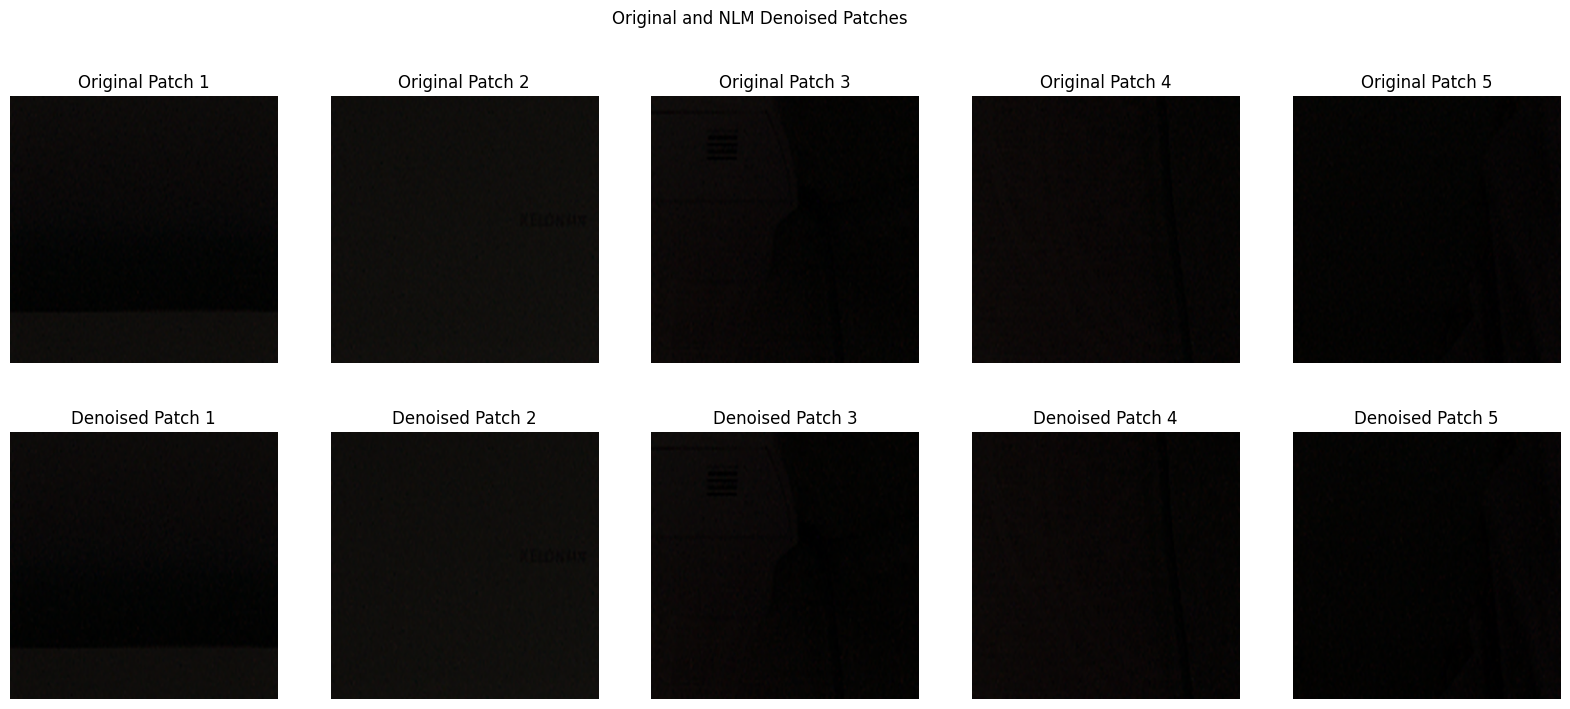

In [ ]:
def display_comparison(original_paths, denoised_images, title):
    fig, axes = plt.subplots(2, len(original_paths), figsize=(20, 8))
    for ax, original_path, denoised_image, idx in zip(axes[0], original_paths, denoised_images, range(len(original_paths))):
        original_image = Image.open(original_path)
        ax.imshow(original_image, cmap='gray')
        ax.set_title(f'Original Patch {idx+1}')
        ax.axis('off')

    for ax, denoised_image, idx in zip(axes[1], denoised_images, range(len(denoised_images))):
        ax.imshow(denoised_image, cmap='gray')
        ax.set_title(f'Denoised Patch {idx+1}')
        ax.axis('off')

    plt.suptitle(title)
    plt.show()

# Display original and denoised patches
original_patch_paths = [os.path.join(train_low_patches_path, patch) for patch in train_low_patches]
display_comparison(original_patch_paths, denoised_patches, 'Original and NLM Denoised Patches')


In [ ]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import Sequence
from PIL import Image
import os

In [ ]:
class ImageDataLoader(Sequence):
    def __init__(self, X_paths, y_paths, batch_size=1, shuffle=False):
        self.X_paths = X_paths
        self.y_paths = y_paths
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return len(self.X_paths) // self.batch_size

    def __getitem__(self, index):
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_X = [self.load_image(self.X_paths[k]) for k in indexes]
        batch_y = [self.load_image(self.y_paths[k]) for k in indexes]

        # Convert lists to numpy arrays
        batch_X = np.array(batch_X) / 255.0  # Normalize X by dividing by 255
        batch_y = np.array(batch_y) / 255.0  # Normalize y by dividing by 255

        return batch_X, batch_y

    def load_image(self, img_path):
        image = Image.open(img_path).convert('RGB')  # Open image as RGB
        image = image.resize((256, 256), Image.ANTIALIAS)  # Resize image to desired size
        image_array = np.array(image)
        return image_array

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.X_paths))
        if self.shuffle:
            np.random.shuffle(self.indexes)



In [ ]:
# Define paths for train and test image patches
train_high_patches_path = 'train_patches/high'
train_low_patches_path = 'train_patches/low'
test_high_patches_path = 'test_patches/high'
test_low_patches_path = 'test_patches/low'

# Get list of file names for train and test patches
train_high_files = sorted(os.listdir(train_high_patches_path))
train_low_files = sorted(os.listdir(train_low_patches_path))
test_high_files = sorted(os.listdir(test_high_patches_path))
test_low_files = sorted(os.listdir(test_low_patches_path))

# Create full paths for train and test image patches
train_high_paths = [os.path.join(train_high_patches_path, fname) for fname in train_high_files]
train_low_paths = [os.path.join(train_low_patches_path, fname) for fname in train_low_files]
test_high_paths = [os.path.join(test_high_patches_path, fname) for fname in test_high_files]
test_low_paths = [os.path.join(test_low_patches_path, fname) for fname in test_low_files]

# Define batch size
batch_size = 32

# Create data loaders
train_data_loader = ImageDataLoader(train_high_paths, train_low_paths, batch_size=batch_size, shuffle=True)
test_data_loader = ImageDataLoader(test_high_paths, test_low_paths, batch_size=batch_size, shuffle=True)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import Mean, RootMeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Define paths for train and test image patches
train_high_patches_path = 'train_patches/high'
train_low_patches_path = 'train_patches/low'
test_high_patches_path = 'test_patches/high'
test_low_patches_path = 'test_patches/low'


In [ ]:
# Clear any existing Keras session
tf.keras.backend.clear_session()

# Define input shape
input_shape = (256, 256, 3)
input_img = Input(shape=input_shape)

# Encoder
x = Conv2D(32, (3, 3), activation="relu", kernel_initializer='he_normal', padding="same")(input_img)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(64, (3, 3), activation="relu", kernel_initializer='he_normal', padding="same")(x)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(128, (3, 3), activation="relu", kernel_initializer='he_normal', padding="same")(x)
x = MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = Conv2DTranspose(128, (3, 3), strides=2, activation="relu", kernel_initializer='he_normal', padding="same")(x)
x = Conv2DTranspose(64, (3, 3), strides=2, activation="relu", kernel_initializer='he_normal', padding="same")(x)
x = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", kernel_initializer='he_normal', padding="same")(x)
decoded = Conv2D(3, (3, 3), activation="sigmoid", kernel_initializer='he_normal', padding="same")(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)


In [ ]:
# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=1e-3), loss='mse')


In [ ]:
# Create data loaders
batch_size = 32
train_data_loader = ImageDataLoader(train_high_paths, train_low_paths, batch_size=batch_size, shuffle=True)
test_data_loader = ImageDataLoader(test_high_paths, test_low_paths, batch_size=batch_size, shuffle=False)

# Define number of epochs
epochs = 1

# Train the model
history = autoencoder.fit(train_data_loader,
                          epochs=epochs,
                          steps_per_epoch=len(train_data_loader),
                          validation_data=test_data_loader,
                          validation_steps=len(test_data_loader),
                          verbose=1)


<ipython-input-20-22368b2a5c32>:25: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((256, 256), Image.ANTIALIAS)  # Resize image to desired size


202/202 [==============================] - 2694s 13s/step - loss: 0.0087 - val_loss: 0.0045


In [ ]:
# Evaluate the model on training data
train_loss = autoencoder.evaluate(train_data_loader, steps=len(train_data_loader))
print(f"Train Loss (MSE): {train_loss}")

# Evaluate the model on test data
test_loss = autoencoder.evaluate(test_data_loader, steps=len(test_data_loader))
print(f"Test Loss (MSE): {test_loss}")


<ipython-input-20-22368b2a5c32>:25: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((256, 256), Image.ANTIALIAS)  # Resize image to desired size


202/202 [==============================] - 797s 4s/step - loss: 0.0087
Train Loss (MSE): 0.008724034763872623
40/40 [==============================] - 148s 4s/step - loss: 0.0045
Test Loss (MSE): 0.004547387361526489


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from PIL import Image
import os

# Define paths for train and test image patches
train_high_patches_path = 'train_patches/high'
train_low_patches_path = 'train_patches/low'
test_high_patches_path = 'test_patches/high'
test_low_patches_path = 'test_patches/low'

# Load data loaders or define your custom ImageDataLoader class here (from previous implementation)

# Define function to calculate PSNR
def calculate_psnr(original_image, denoised_image):
    mse = np.mean((original_image - denoised_image) ** 2)
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Function to load and preprocess images
def load_image(img_path):
    image = Image.open(img_path).convert('RGB')  # Open image as RGB
    image = image.resize((256, 256), Image.ANTIALIAS)  # Resize image to desired size
    image_array = np.array(image) / 255.0  # Normalize image
    return image_array

# Evaluate PSNR on test dataset
def evaluate_psnr(model, data_loader):
    psnr_values = []
    for batch_X, batch_y in data_loader:
        # Predict denoised images
        denoised_images = model.predict(batch_X)

        # Calculate PSNR for each pair of original and denoised images in the batch
        for original, denoised in zip(batch_y, denoised_images):
            psnr = calculate_psnr(original, denoised)
            psnr_values.append(psnr)

    # Return average PSNR over all images
    return np.mean(psnr_values)

# Load the trained autoencoder model
# Assuming `autoencoder` is your trained model from the previous steps

# Create data loaders
batch_size = 32
train_data_loader = ImageDataLoader(train_high_paths, train_low_paths, batch_size=batch_size, shuffle=False)
test_data_loader = ImageDataLoader(test_high_paths, test_low_paths, batch_size=batch_size, shuffle=False)

# Evaluate PSNR on training and test datasets
train_psnr = evaluate_psnr(autoencoder, train_data_loader)
test_psnr = evaluate_psnr(autoencoder, test_data_loader)

print(f"Train PSNR: {train_psnr:.2f} dB")
print(f"Test PSNR: {test_psnr:.2f} dB")



<ipython-input-20-22368b2a5c32>:25: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((256, 256), Image.ANTIALIAS)  # Resize image to desired size


1/1 [==============================] - 3s 3s/step
Train PSNR: 73.19 dB
Test PSNR: 75.74 dB
